# Exercícios Computacionais de Probabilidade

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### QUESTÃO 1:

Sejam $X_i$ $(i \in \mathbb{N})$ variáveis aleatórias Bernoulli com $p = 0.5$.

a) Prove que
$ X = \sum_{i=1}^{\infty} 2^{-i} X_i $
tem distribuição uniforme em $[0, 1]$.

b) Como computadores fazem representações de números com precisão finita, podemos truncar o
somatório do item anterior após $k$ parcelas para um valor de $k$ suficientemente grande para
que a precisão numérica da máquina seja alcançada. Encontre este valor de $k$ e use esse
procedimento para programar um gerador de números uniformemente distribuídos.

c) Amostre $n = 1000$ variáveis uniformes em $[0, 1]$ usando seu gerador e verifique se seguem a
distribuição correta ao plotar o histograma usando o Matplotlib ou Seaborn.

**RESOLUÇÃO:**

**Item a)**

Prova:

Os $X_i$ são variáveis aleatórias de Bernoulli com $p = 0.5$. Podemos escrever $X_i$ como:
$X_i \sim \text{Bernoulli}(0.5)$
A série $X = \sum_{i=1}^{\infty} 2^{-i} X_i$ pode ser interpretada como uma representação binária de um número entre 0 e 1,
onde cada $X_i$ é um dígito binário (0 ou 1) com probabilidade igual. Isso é similar à expansão binária de números no intervalo [0, 1].
Quando $X_i$ são variáveis de Bernoulli independentes com $p = 0.5$, cada $X_i$ é igualmente provável de ser 0 ou 1.
Isso implica que $X$ é igualmente provável de assumir qualquer valor no intervalo [0, 1], ou seja, $X$ tem uma distribuição uniforme em [0, 1].

**Item b)**

Escolha de $k$:

A precisão numérica típica dos computadores é em torno de $10^{-16}$. Precisamos encontrar um valor de $k$ tal que a soma dos termos após $k$ seja menor que essa precisão:

$$\sum_{i=k+1}^{\infty} 2^{-i} < 10^{-16}$$

A soma da série geométrica infinita a partir do termo $k+1$ é:

$$\sum_{i=k+1}^{\infty} 2^{-i} = 2^{-k}$$

Queremos:

$$2^{-k} < 10^{-16}$$

Tomando o logaritmo de ambos os lados, obtemos:

$$k > \log_2(10^{16}) \approx 53.15$$

Portanto, escolheremos $k = 54$ para garantir a precisão desejada.

In [2]:
def gerar_numero_uniforme(k=54):
    xi = np.random.binomial(1, 0.5, k)
    uniform = sum(xi[i] * 2**-(i + 1) for i in range(k))
    return uniform

# Teste do gerador
num_amostras = 1000
amostras = [gerar_numero_uniforme() for _ in range(num_amostras)]

**Item c)**

Amostragem de $n = 1000$ variáveis uniformes em $[0, 1]$

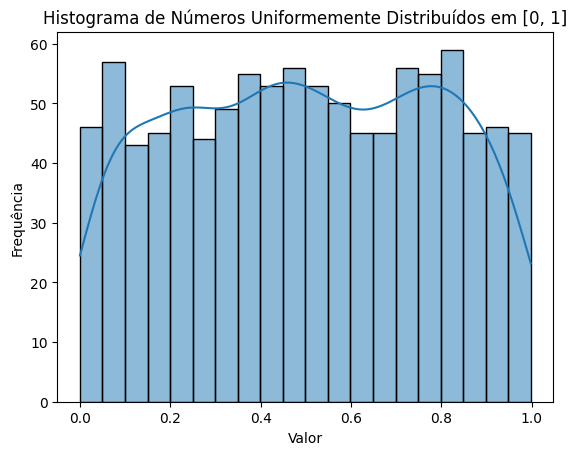

In [3]:
n = 1000
amostras = [gerar_numero_uniforme() for _ in range(n)]

# Plotando o histograma das amostras geradas
sns.histplot(amostras, bins=20, kde=True)
plt.title('Histograma de Números Uniformemente Distribuídos em [0, 1]')
plt.xlabel('Valor')
plt.ylabel('Frequência')
plt.show()

### Questão 2:

Como discutido em aula, tendo um gerador de números uniformemente distribuídos, podemos obter
amostras de várias outras distribuições.

a) Usando a transformação quantil, crie um gerador para $X ∼ Expo(1)$; plote um histograma
para verificar seus resultados.

b) Usando transformação de Box-Muller, crie um gerador para $X ∼ N (0, 1)$; plote um histograma
para verificar seus resultados.

**Item a)**

A transformação quantil usa a inversa da função de distribuição acumulada (CDF) para transformar uma variável uniformemente distribuída $ U \sim \text{Uniform}(0, 1) $ em uma variável $ X $ que segue uma distribuição desejada.

Para uma distribuição exponencial com parâmetro $\lambda = 1$:
$$ X = -\ln(1 - U) $$

Como $ U \sim \text{Uniform}(0, 1) $, podemos simplificar para:
$$ X = -\ln(U) $$

Vamos implementar isso em Python e gerar um histograma para verificar os resultados.

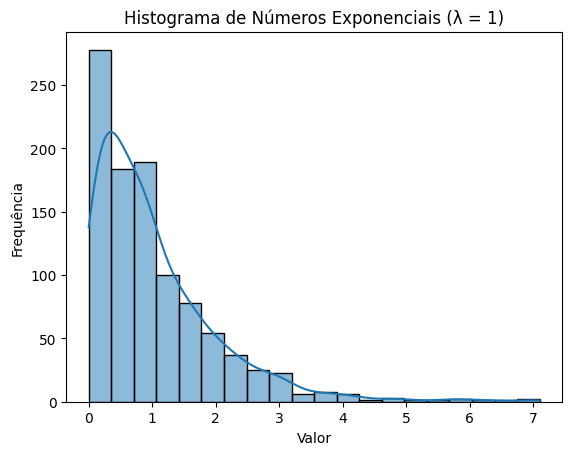

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Gerador de variáveis exponenciais usando a transformação quantil
def gerar_exponencial(lambda_param=1.0, size=1000):
    U = np.random.uniform(0, 1, size)
    X = -np.log(U) / lambda_param
    return X

# Gerando amostras
amostras_exponencial = gerar_exponencial(size=1000)

# Plotando o histograma das amostras geradas
sns.histplot(amostras_exponencial, bins=20, kde=True)
plt.title('Histograma de Números Exponenciais (λ = 1)')
plt.xlabel('Valor')
plt.ylabel('Frequência')
plt.show()

**Item b)**

A transformação de Box-Muller transforma duas variáveis uniformemente distribuídas $ U_1 $ e $ U_2 $ em duas variáveis normalmente distribuídas $ Z_0 $ e $ Z_1 $.

As fórmulas da transformação de Box-Muller são:
$$ Z_0 = \sqrt{-2 \ln(U_1)} \cos(2 \pi U_2) $$
$$ Z_1 = \sqrt{-2 \ln(U_1)} \sin(2 \pi U_2) $$

Vamos implementar isso em Python e gerar um histograma para verificar os resultados.

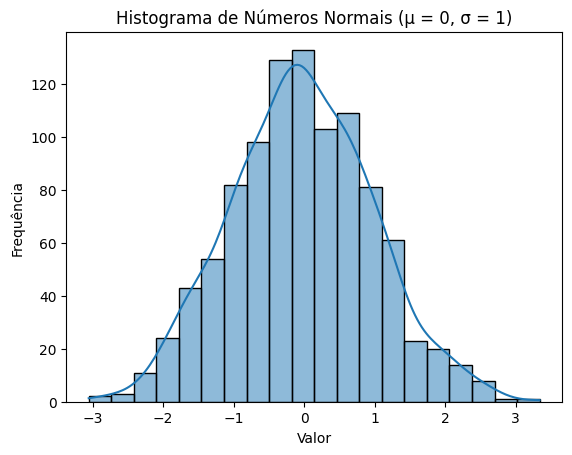

In [5]:
# Gerador de variáveis normais usando a transformação de Box-Muller
def gerar_normal(size=1000):
    U1 = np.random.uniform(0, 1, size)
    U2 = np.random.uniform(0, 1, size)
    Z0 = np.sqrt(-2 * np.log(U1)) * np.cos(2 * np.pi * U2)
    Z1 = np.sqrt(-2 * np.log(U1)) * np.sin(2 * np.pi * U2)
    return Z0, Z1

# Gerando amostras
Z0, Z1 = gerar_normal(size=500)  # Geramos 500 pares para totalizar 1000 amostras

# Concatenando Z0 e Z1 para ter 1000 amostras no total
amostras_normal = np.concatenate((Z0, Z1))

# Plotando o histograma das amostras geradas
sns.histplot(amostras_normal, bins=20, kde=True)
plt.title('Histograma de Números Normais (μ = 0, σ = 1)')
plt.xlabel('Valor')
plt.ylabel('Frequência')
plt.show()